# ``Start-Commerce App: A/B Testing for Enhanced User Experience``

## Background Problem

Tim Data Start-Commerce mengalami penurunan konversi situs web sebesar 10%, yang menjadi masalah utama manajemen perusahaan. Situs web merupakan jembatan utama antara pelanggan dan mitra, sehingga menjadi metrik penting sebagai penentu keberhasilan perusahaan karena revenue diperoleh dari tingkat transaksi yang terjadi.

Melalui survei pengguna App, Tim Data menemukan bahwa pengguna tidak nyaman dengan tampilan ukuran ikon menu yang terlalu kecil dan banyak. Hal ini menyebabkan kesalahan klik dan pengguna merasa frustasi dengan keterlambatan dalam memuat halaman.

Untuk memperbaiki masalah ini, manajemen menugaskan Tim Data untuk melakukan perbandingan antara desain aplikasi sebelumnya dan versi terbaru melalui A/B testing. Tujuannya adalah untuk mengidentifikasi perbedaan utama dan menentukan perubahan yang diperlukan untuk meningkatkan kinerja tampilan applikasi, dengan fokus pada tata letak, warna, ukuran tombol, dan navigasi.

### Objective 
 1. Menentukan jumlah sampel dari data yang diperlukan untuk testing pada App.
 2. Mengolah data untuk menentukan conversion rate App versi terbaik.
 3. Memberikan rekomendasi manajemen perusahaan berdasarkan testing yang telah dilakukan

 ### Tujuan 
 Meningkatkan metrik conversion rate menjadi 20% melalui A/B testing.

### Pembahasan
Perusahaan menginginkan tim data untuk melakukan tes apakah perubahan versi baru aplikasi Start-Commerce dapat memberikan pengalaman yang lebih baik kepada pengguna sehingga meningkatkan kenyamanan pengguna dalam melakukan aktivitas di aplikasi. Ini merupakan langkah yang penting dalam meningkatkan retensi pengguna, memperbaiki konversi, dan akhirnya meningkatkan keseluruhan kinerja aplikasi. Dengan melakukan A/B testing, tim data akan dapat mengidentifikasi secara objektif apakah perubahan yang diusulkan memberikan hasil yang signifikan dan layak untuk diterapkan secara luas dalam aplikasi.

## 1. Menentukan Ukuran Sampel

In [33]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

# seed untuk ouput yang digunakan
np.random.seed(0)


Dalam menentukan sample disarankan untuk menggunakan random sampling artinya cara menentukan user yang mendapat akses ke versi lama (control) dan versi baru (testing) dipilih secara random agar hasil eskperimen lebih general dan valid.

pengolahan statistika:
1. P-value 
2. signifikan level : probabilitas mendeteksi perubahan (jika diasumsikan tidak ada) --> 0.05
3. power level: probabilitas mendeteksi perubahan (jika diasumsikan ada) (1 - ) --> 80%
4. Minimum Detectable Effect (MDE) --> 2 (sangat sensitif)

di sini kita menggunakan dummy data sehingga dapat disesuaikan:

In [34]:
import math
import scipy.stats as stats

# parameter
# tingkat signifikansi 95%
alpha = 0.05  

# probabilitas kesalahan tipe II
beta = 0.2  

# daya uji
power = 1 - beta  

# conversion rate control
p1 = 0.1

# conversion rate testing
p2 = 0.2  

# ukuran efek
effect_size = p2 - p1  

# nilai z untuk alpha dan beta
z_alpha = stats.norm.ppf(1 - alpha/2)
z_beta = stats.norm.ppf(power)


# rata-rata proporsi
p_hat = (p1 + p2) / 2

# perhitung ukuran sampel
n = ((z_alpha * math.sqrt(2 * p_hat * (1 - p_hat))\
       + z_beta * math.sqrt(p1 * (1 - p1) + p2 * \
       (1 - p2))) / effect_size) ** 2

# pembulatan ke atas
n = round(n)  

# menampilkan hasil
print(f"ukuran sampel yang diperlukan per kelompok: {n}")


ukuran sampel yang diperlukan per kelompok: 199


maka dalam penelitian ini akan dibutuhkan 199 sample pada setiap kelompok untuk melanjutkan A/B testing dengan tingkat signifikansi 95% dan daya uji (power) 80% untuk mendeteksi perbedaan conversion rate kedua kelompok.

In [35]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# ukuran sampel 
sample_size = 199

# ID user
control_users = np.arange(1, sample_size + 1)
test_users = np.arange(sample_size + 1, 2 * sample_size + 1)

# conversion rate 
conversion_rate_control = np.random.uniform(0.3, 
                                            1.5, 
                                            sample_size).round(5) 
conversion_rate_test = np.random.uniform(0.6, 
                                         1.8, 
                                         sample_size).round(5)  

# engagement 
engagement_control = np.random.randint(1, 
                                       400, 
                                       sample_size)  
engagement_test = np.random.randint(1, 
                                    400, 
                                    sample_size)  

# buat DataFrame
df_control = pd.DataFrame({
    'ID_user': control_users,
    'Conversion_rate': conversion_rate_control,
    'Engagement': engagement_control,
    'Group': 'control'
})

df_test = pd.DataFrame({
    'ID_user': test_users,
    'Conversion_rate': conversion_rate_test,
    'Engagement': engagement_test,
    'Group': 'testing'
})

# merge
df = pd.concat([df_control, df_test])

# mengacak ID 
df['ID_user'] = df['ID_user'].sample(frac=1).reset_index(drop=True)

# conversion rate menjadi biner (1 jika rate > 0.5, 0 jika <= 0.5) untuk keperluan uji statistik
df['Converted'] = (df['Conversion_rate'] > 0.5).astype(int)

# mengambil data
control_group = df[df['Group'] == 'control']['Converted']
test_group = df[df['Group'] == 'testing']['Converted']

# hitung tingkat conversion rate
control_conversion_rate = control_group.mean()
test_conversion_rate = test_group.mean()

# uji z dua proporsi
counts = np.array([control_group.sum(), 
                   test_group.sum()])
nobs = np.array([sample_size, 
                 sample_size])
stat, p_value = proportions_ztest(counts, 
                                  nobs, alternative='two-sided')

# menampilkan ouput
print(f"tingkat conversion rate grup control: {control_conversion_rate * 100:.2f}%")
print(f"tingkat conversion rate grup testing: {test_conversion_rate * 100:.2f}%")
print(f"P-value: {p_value:.5f}")
df


tingkat conversion rate grup control: 81.91%
tingkat conversion rate grup testing: 100.00%
P-value: 0.00000


,ID_user,Conversion_rate,Engagement,Group,Converted
0,47,0.95858,219,control,1
1,274,1.15823,156,control,1
2,327,1.02332,185,control,1
3,393,0.95386,121,control,1
4,346,0.80839,322,control,1
...,...,...,...,...,...
194,300,1.61885,240,testing,1
195,330,0.63997,279,testing,1
196,136,1.75078,366,testing,1
197,309,1.02644,396,testing,1


dummy data set dibuat mengunakan paramater yang telah ditentukan sebelumnya.

 ## 2. Mengolah data untuk menentukan conversion rate App versi terbaik.


In [36]:
# standar deviasi sampel
sample_std_control = np.std(df[df['Group'] 
                               == 'control']['Conversion_rate'], ddof=1)
sample_std_testing = np.std(df[df['Group'] 
                                 == 'testing']['Conversion_rate'], ddof=1)

# ukuran sampel
sample_size_control = len(df[df['Group'] 
                             == 'control']['Conversion_rate'])
sample_size_treatment = len(df[df['Group'] 
                               == 'testing']['Conversion_rate'])

# hitung standar error
se_control = sample_std_control / np.sqrt(sample_size_control)
se_testing = sample_std_testing / np.sqrt(sample_size_treatment)

print("Standar Error sampel control:", se_control)
print("Standar Error sampel testing:", se_testing)


Standar Error sampel control: 0.024269725907290277
Standar Error sampel testing: 0.024890925991216475


Standar Error dari data sample yang telah ditentukan mendekati populasi yakni  0.024 untuk sampel control dan sampel testing. artinya menunjukkan bahwa variasi dalam sampel cukup dekat dengan variasi dalam populasi. selanjutnya kita dapat melihat distribusi sampel 


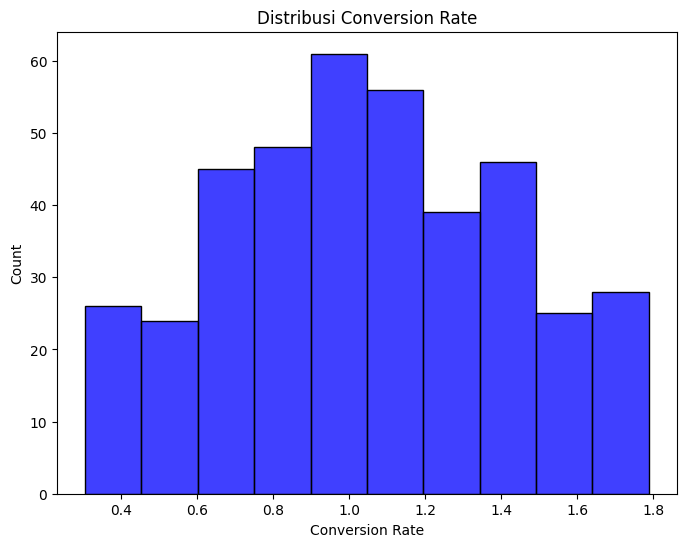

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# distribusi data conversion rate
plt.figure(figsize=(8, 6))
sns.histplot(df['Conversion_rate'], 
             color='blue')
plt.title('Distribusi Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Count')
plt.show()


In [38]:
df['Conversion_rate'].describe()

count    398.000000
mean       1.047362
std        0.376097
min        0.305630
25%        0.761167
50%        1.040740
75%        1.341675
max        1.788410
Name: Conversion_rate, dtype: float64

dari visualisasi dan deskripsi di atas menunjukkan bahwa data berdistribusi normal dengan rata-rata tidak jauh dari mediannya yakni 1.04 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14192\357325491.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Group',


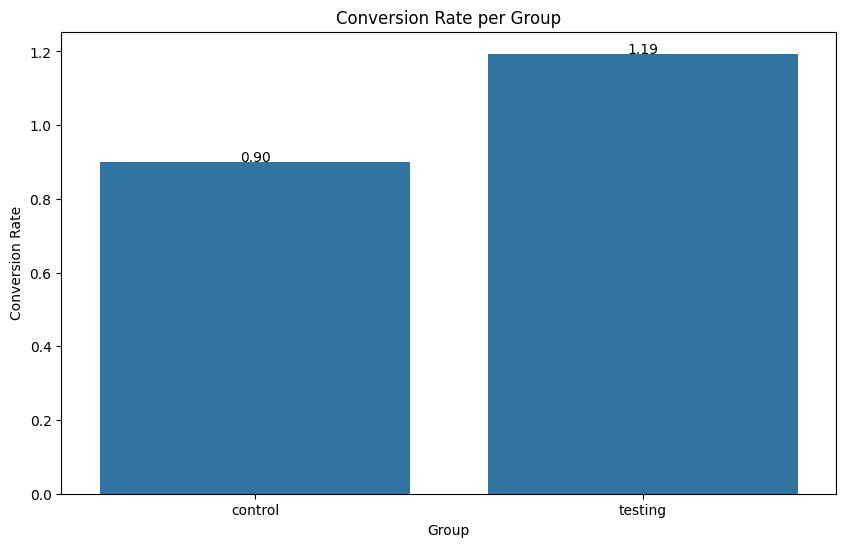

In [39]:
# membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', 
            y='Conversion_rate', 
            data=df, ci=None)  
plt.title('Conversion Rate per Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')

# menampilkan nilai
for index, value in enumerate(df.groupby('Group')['Conversion_rate'].mean()):
    plt.text(index, 
             value, 
             f'{value:.2f}', 
             color='black', 
             ha='center')

# menampilkan hasil
plt.show()

In [40]:
from scipy.stats import ttest_ind

# variance data
control_variance = np.var(df[df['Group'] == 'control']['Conversion_rate'])
testing_variance = np.var(df[df['Group'] == 'testing']['Conversion_rate'])

print('Variansi data control:', control_variance)
print('Variansi data testing:', testing_variance)


# hipotesis nol dan alternatif
# H0: Tidak ada perbedaan yang signifikan antara rata-rata conversion rate kelompok control dan kelompok testing
# H1: Terdapat perbedaan yang signifikan antara rata-rata conversion rate kelompok control dan kelompok testing

# tingkat signifikansi 
alpha = 0.05

# hitung independent samples t-test
t_statistic, p_value = ttest_ind(df[df['Group'] == 'control']['Conversion_rate'],
                                  df[df['Group'] == 'testing']['Conversion_rate'],
                                  alternative='two-sided')

# bandingkan p-value dengan alpha
if p_value < alpha:
   print("Menolak hipotesis nol")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol")

# rerata control dan testing
mean_conversion_rate = df.groupby('Group')['Conversion_rate'].mean().reset_index()
mean_conversion_rate


Variansi data control: 0.1166258799317694
Variansi data testing: 0.12267252294664276
Menolak hipotesis nol


,Group,Conversion_rate
0,control,0.900924
1,testing,1.193800


meskipun terdapat perbedaan perlu untuk divalidasi lebih lanjut lagi.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14192\1469262872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group',


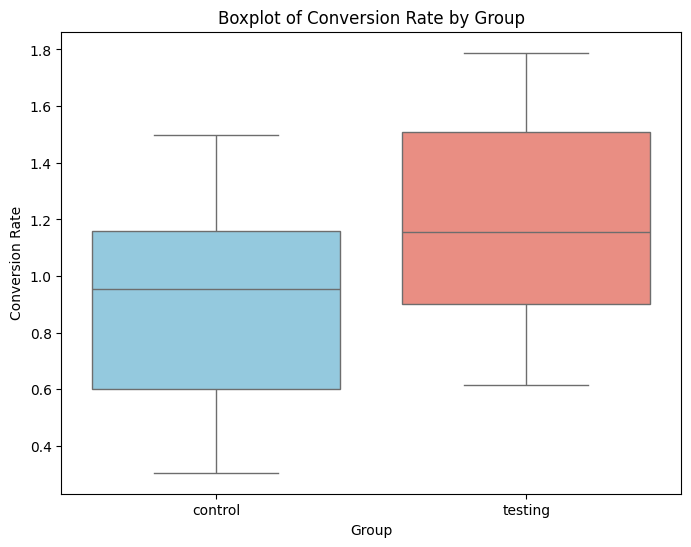

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# membuat visualisasi boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', 
            y='Conversion_rate', 
            data=df, 
            palette=["skyblue", 
                     "salmon"])
plt.title('Boxplot of Conversion Rate by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.show()


dari data visual di atas menunjukkan bahwa testing lebih tinggi dibandingkan control. 

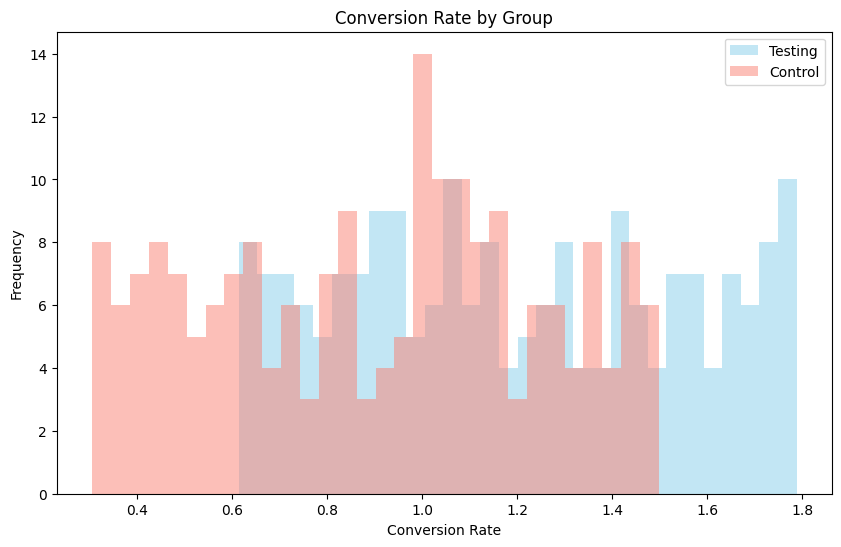

In [42]:
import matplotlib.pyplot as plt

# mengambil nilai Conversion Rate 
treatment_conversion_rate = df[df['Group'] == 'testing']['Conversion_rate']
control_conversion_rate = df[df['Group'] == 'control']['Conversion_rate']

# membuat histogram
plt.figure(figsize=(10, 6))
plt.hist(treatment_conversion_rate, 
         alpha=0.5, 
         label='Testing', 
         bins=30, 
         color='skyblue')
plt.hist(control_conversion_rate, 
         alpha=0.5, 
         label='Control', 
         bins=30, 
         color='salmon')

# judul dan label
plt.title('Conversion Rate by Group')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()

# menampilkan ouput
plt.show()


Berdasarkan visualisasi di atas dapat terlihat bahwa conversion rate pada group testing lebih tinggi dibandingkan dengan group control. Agar lebih akukrat diperlukan analisis statistik

## Uji Hipotesis

### Rumusan Hipotesis:
- **H0**: Varians kedua kelompok sama (tidak ada perbedaan yang signifikan dalam varian antara kelompok control dan testing).
- **H1**: Varians kedua kelompok tidak sama (ada perbedaan yang signifikan dalam varian antara kelompok control dan testing).

### Langkah-langkah Uji Hipotesis:
1. **Uji F-Test**: 
   - Menggunakan uji F untuk membandingkan varian dari kedua kelompok.
   - Jika nilai p-value kurang dari tingkat signifikansi, maka menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan dalam varian antara kelompok control dan testing.

2. **Uji T-Test**:
   - Uji t-test digunakan untuk membandingkan rata-rata antara kedua kelompok.
   - Jika nilai p-value dari uji t-test lebih kecil dari tingkat signifikansi  maka menolak hipotesis nol dan menyimpulkan bahwa terdapat perbedaan yang signifikan antara rata-rata kedua kelompok.

3. **Analisis Bland-Altman**:
   - Dilakukan untuk memeriksa konsistensi antara dua metode pengukuran atau dua kelompok pengukuran.
   - Melalui plot Bland-Altman dapat melihat seberapa seragam dan sejauh mana perbedaan antara kedua kelompok.



In [43]:
from scipy.stats import f_oneway

# mengambil data
control_data = df[df['Group'] == 'control']['Conversion_rate']
test_data = df[df['Group'] == 'testing']['Conversion_rate']

# uji ANOVA
f_stat, p_value = f_oneway(control_data,
                           test_data)

# signifikansi
alpha = 0.05

# bandingkan p-value dengan alpha
if p_value < alpha:
    print("Hipotesis nol ditolak. Ada perbedaan yang signifikan antara kelompok.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol. Tidak ada perbedaan yang signifikan antara kelompok.")

# tampilkan output
print("F-Statistic:", f_stat)
print("P-Value:", p_value)


Hipotesis nol ditolak. Ada perbedaan yang signifikan antara kelompok.
F-Statistic: 70.9729812861675
P-Value: 6.759394064343478e-16


Hasil uji f menunjukkan bahwa ada perbedaan yang signifikan antara kedua kelompok. Hal ini ditunjukkan oleh nilai p-nilai yakni 0.00 lebih kecil dari alpha yakni 0.05. hasil uji F hanya berguna untuk mengevaluasi perbedaan dalam varians antara kelompok.

selanjutnya kita melakukan uji t digunakan untuk membandingkan rata-rata antara kelompok.

In [44]:
from scipy.stats import ttest_ind

# t-test
t_stat, p_value = ttest_ind(control_data, 
                            test_data, 
                            equal_var=False)

# signifikansi
alpha = 0.05

# bandingkan p-value dengan alpha
if p_value < alpha:
    print("Hipotesis nol ditolak. Terdapat perbedaan yang signifikan antara kedua kelompok.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol. Tidak terdapat perbedaan yang signifikan antara kedua kelompok.")

# menampilkan output
print("T-Statistic:", t_stat)
print("P-Value:", p_value)


Hipotesis nol ditolak. Terdapat perbedaan yang signifikan antara kedua kelompok.
T-Statistic: -8.424546354918316
P-Value: 6.770727700889736e-16


Dengan nilai p-value yakni 0.00 serta nilai t-statistic yang besar secara absolut, yaitu -8.42, artinya menolak hipotesis nol. Ini menunjukkan bahwa ada perbedaan yang signifikan antara rata-rata conversion rate antara kelompok kontrol dan kelompok testing. 

Dengan kata lain, terdapat bukti yang cukup untuk menyatakan bahwa testing yang diberikan memiliki dampak yang signifikan terhadap tingkat konversi dibandingkan dengan kelompok kontrol.

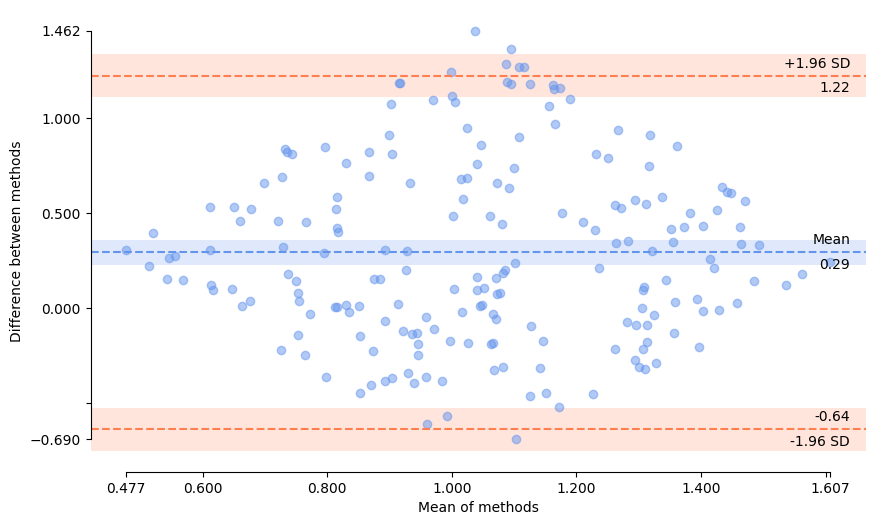

In [45]:
import pyCompare
import matplotlib.pyplot as plt

# ukuran 
fig, ax = plt.subplots(figsize=(10, 6))

# plot Bland-Altman
pyCompare.blandAltman(test_data, 
                      control_data, 
                      ax=ax)
plt.show()


In [46]:
import pandas as pd

# hitung perbedaan 
difference = test_data - control_data

# hitung statistik deskriptif
mean_difference = difference.mean()
std_difference = difference.std()

# hitung batas kesepakatan (1.96 kali standar deviasi)
agreement_limit = 1.96 * std_difference

# simpan statistik ke df
bland_altman = pd.DataFrame({
    'Mean Difference': [mean_difference],
    'Standard Deviation of Difference': [std_difference],
    'Agreement Limit': [agreement_limit]
})

# tampilkan output
bland_altman


,Mean Difference,Standard Deviation of Difference,Agreement Limit
0,0.292876,0.476426,0.933794


hasil dari analisis Bland-Altman, mean difference merupakan rata-rata dari selisih antara observasi pada kelompok testing dan kelompok control yakni 0.29

Standard deviation of difference mengukur seberapa bervariasinya perbedaan antara dua kelompok yakni 0.47 menunjukkan variasi yang signifikan dalam perbedaan antara kedua kelompok.

Agreement limit, yang dihitung sebagai 1.96 kali standard deviation of difference sebesar 0.933 di bawah 95% sehingga dapat diterima.







In [47]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

# hitung confidence interval
cm = CompareMeans(DescrStatsW(data=test_data), 
                  DescrStatsW(data=control_data))
lower, upper = cm.tconfint_diff(alpha=0.05, 
                                alternative='two-sided',
                                usevar='unequal')

print("Confidence Interval:", "[", lower, upper, "]")


Confidence Interval: [ 0.2245296343129613 0.3612224259885461 ]


Confidence interval tersebut menunjukkan bahwa rerata sample control dan testing memiliki perbedaan direntang 0.2245 hingga 0.3612, pada tingkat signifikansi 0.05 (95%)


 ## 3. Memberikan rekomendasi manajemen perusahaan berdasarkan testing yang telah dilakukan
### Simulasi

In [48]:
# coversion rate control
control = 0.900924

# coversion rate testing
testing = 1.193800

# hitung persentase kenaikan 
increase = ((testing - control) / control) * 100

# validasi kenaikan 
validasi = increase > 20

# output applikais
group_better = "applikasi testing" if validasi else "applikasi control"

print("increase more than 20%:", validasi)
print("the better app is:", group_better)
print("increase: ", increase )


increase more than 20%: True
the better app is: applikasi testing
increase:  32.5084024845603


terjadi kenaikan sebesar 32% secara statistik berdasarkan data sample yang digunakan pada A/B testing applikasi Start-Commerce 

## Kesimpulan dan Rekomendasi

- testing ini memerlukan 199 sampel pada setiap kelompok untuk melanjutkan A/B testing dengan tingkat signifikansi 95% dan daya uji (power) 80% untuk mendeteksi perbedaan conversion rate antara kedua kelompok.
- Hasil uji F menunjukkan bahwa terdapat perbedaan yang signifikan antara kedua kelompok, dengan nilai p-nilai (p-value) sebesar 0.00 yang lebih kecil dari alpha (0.05). Namun, perlu diingat bahwa hasil uji F hanya berguna untuk mengevaluasi perbedaan dalam varians antara kelompok.
- Selanjutnya, uji t digunakan untuk membandingkan rata-rata antara kedua kelompok. Dengan nilai p-value sebesar 0.00 dan nilai t-statistic sebesar -8.42, kita dapat menolak hipotesis nol dengan yakin. Hal ini menunjukkan bahwa ada perbedaan yang signifikan antara rata-rata conversion rate antara kelompok kontrol dan kelompok testing. Dengan kata lain, testing yang diberikan memiliki dampak yang signifikan terhadap tingkat konversi dibandingkan dengan kelompok kontrol.
- Analisis Bland-Altman menunjukkan bahwa mean difference (rata-rata selisih) antara observasi pada kelompok testing dan kelompok kontrol adalah 0.29. Standard deviation of difference (standar deviasi dari selisih) sebesar 0.47, menunjukkan variasi yang signifikan dalam perbedaan antara kedua kelompok. Agreement limit yang dihitung sebagai 1.96 kali standard deviation of difference sebesar 0.933, menunjukkan bahwa hasilnya dapat diterima.
- Confidence interval menunjukkan bahwa perbedaan rerata antara sample control dan testing berada dalam rentang 0.2245 hingga 0.3612, pada tingkat signifikansi 0.05 (95%). Ini menandakan bahwa terjadi kenaikan sebesar 32% secara statistik berdasarkan data sample yang digunakan pada A/B testing aplikasi Start-Commerce.

**Kesimpulan**: Berdasarkan hasil analisis, dapat disimpulkan bahwa testing yang diberikan pada kelompok testing memiliki dampak yang signifikan terhadap tingkat konversi dibandingkan dengan kelompok kontrol. 
Rekomendasi dapat diberikan kepada manajemen perusahaan untuk menerapkan perubahan atau fitur yang diuji pada kelompok testing secara luas dalam aplikasi Start-Commerce untuk meningkatkan kinerjanya.

**Rekomendasi:**

1. **A/B Testing**: Lanjutkan A/B testing antara desain aplikasi sebelumnya dan versi terbaru untuk mengidentifikasi perbedaan signifikan dalam tingkat konversi.

2. **Perbaikan Desain**: Fokus pada peningkatan tata letak, ukuran tombol, warna, dan navigasi untuk meningkatkan kenyamanan pengguna.

3. **Pemantauan Kinerja**: Setelah penerapan perubahan, pantau kinerja aplikasi secara berkala untuk memastikan efektivitasnya dalam meningkatkan pengalaman pengguna.